In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import *
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from __future__ import division

### Expected tosses to get $N$ consecutive heads

Consider the expected number of coin tosses to get HHH, and let $X$ be the event that HHH happens. Note that in this process flipping a tails means we have to start all over again. So for example if you flip HT, you then waste two flips before you take another $E[X]$ flips to get HHH. 

Basically we now tabulate the discrete probability cases in which we get three heads:
* We get three heads immediately, with probability $1/2^3$.
* We get three heads, conditional on getting T first. We get that tail with probability $1/2$.
* We get three heads, conditional on getting HT. That happens with probability $1/4$.
* We get three heads, conditional on getting HHT. That happens with probability $1/8$.

Note that we don't have to consider any more Hs such as HHHT because that would mean we win the game. And we do not consider multiple Ts e.g. TT, because the process restarts when you get just one T.

$$ E(HHH) = E(HHH|0)P(HHH) + E(HHH|T)P(T) + E(HHH|HT)P(HT) + E(HHH|HHT)P(HHT) $$

$$ E = \frac{1}{2^3} + (E+1) \frac{1}{2} + (E+2) \frac{1}{4} + (E+3)\frac{1}{8} $$

We can generalise this of course. Here we write the expected tosses to get $n$ consecutive heads as a finite series with $n$ terms.

$$ E \left( 1 - \frac{1}{2}  \dots - \frac{1}{2^n} \right) = \frac{1}{2^n} + \left( \frac{1}{2} + \frac{2}{2^2} + \frac{3}{2^3} \dots + \frac{n}{2^n} \right) $$

In [12]:
def expected_tosses(N):
    # N = 3
    frac = 1
    summ = 0
    lsum = N/2**N
    for i in range(1,N+1):
        frac -= 1/2**i
        summ += i/2**i

    return ( (lsum + summ)/frac )

In [18]:
x = arange(10)
y = [expected_tosses(xx) for xx in x]

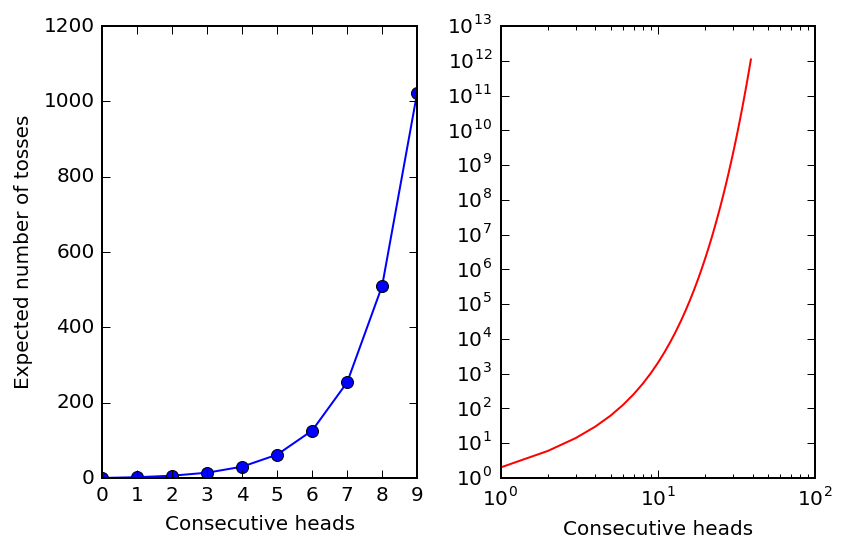

In [25]:
plt.subplot(121)
plt.plot(x,y, 'o-')
plt.ylabel('Expected number of tosses')
plt.xlabel('Consecutive heads')
plt.subplot(122)
x2 = arange(40)
y2 = [expected_tosses(xx) for xx in x2]
plt.loglog(x2,y2, 'r-')
plt.xlabel('Consecutive heads')
plt.tight_layout()

In [29]:
y2[0:5]

[0.0, 2.0, 6.0, 14.0, 30.0]

### Expected tosses to get a HT

From the above we see that the expected number of tosses to get HH is 6. How does this compare with the expected tosses to get HT? Is it more or less? 

Let $E[X]$ be the expected number of tosses to get the first H. 

$$ E[X] = E[H|0] P(H) + E[H|T] P(T) $$

$$ E[X] = \frac{1}{2}\cdot 1 + \frac{1}{2}(E[X] + 1) $$

$$ E[X] = 2 $$

Let $E[Y]$ be the expected number of tosses until we get the tail. 

$$ E[Y] = \frac{1}{2} (E[X]+1) + \frac{1}{2}(E[Y]+1) $$

$$ E[Y] = 4 $$